## Standard linear solid model


$\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, E_0$

      |----vvvvvvv----|
-------|$\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$|------

      |---vvv-----]---|
$\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, E_1 \,\,\,\,\,\,\,\,\,\,\,\,\,\, \eta$

$\sigma = \sigma_e + \sigma_m$

$\epsilon = \epsilon_e = \epsilon_m$

$\epsilon_m = \epsilon_{E_1} + \epsilon^v$

------------------
#### 1. Formulation with $\dot{\epsilon}^v$:

$\sigma = E_0 \epsilon + E_1(\epsilon - \epsilon^v)$

$\dot{\epsilon}^v = \frac{E_1}{\eta} (\epsilon-\epsilon^v)$

#### 2. Formulation with $\dot{\sigma}$ and $\dot{\epsilon}$:

$\sigma + \frac{\eta}{E_1}\dot{\sigma} = E_0\epsilon + \frac{\eta}{E_1}(E_0 + E_1)\dot{\epsilon}$

#### Derivations: 
##### 1. Formulation with $\dot{\epsilon}^v$:

$\sigma = \sigma_{upper\, arm} + \sigma_{lower\, arm} = \sigma_{E_0} + \sigma_{E_1} = E_0\epsilon_{E_0} + E_1\epsilon_{E_1}$

where $\epsilon_{E_0} = \epsilon$, $\epsilon_{E_1} = \epsilon - \epsilon^v$ and $\epsilon^v$ is the strain on the damper. Then:

$\sigma = E_0 \epsilon + E_1(\epsilon - \epsilon^v)$

Also, as per constitutive equation of the damper: $\sigma^v = \eta \dot{\epsilon}^v$, and since $\sigma^v = \sigma_{E_1} = E_1(\epsilon - \epsilon^v)$ we have:

$E_1(\epsilon - \epsilon^v) = \eta \dot{\epsilon}^v$

or

$\dot{\epsilon}^v = \frac{E_1}{\eta}(\epsilon - \epsilon^v)$

##### 2. Formulation with $\dot{\sigma}$ and $\dot{\epsilon}$:

Take the time derivative of the equation for $\sigma$ above:

$\dot{\sigma} = E_0 \dot{\epsilon} + E_1(\dot{\epsilon} - \dot{\epsilon}^v) = (E_0 + E_1)\dot{\epsilon} - \frac{E_1}{\eta}\sigma^v$

Where we have substituted $\sigma^v/\eta$ for $\dot{\epsilon}^v$. Now, $\sigma = \sigma^v + \sigma_{E_0} \, => \, \sigma^v = \sigma - \epsilon E_0$.

$\dot{\sigma} = (E_0 + E_1)\dot{\epsilon} - \frac{E_1}{\eta}\sigma + \frac{E_1 E_0}{\eta}\epsilon$

Multiplying by $\eta/E_1$ and rearranging:

$\sigma + \frac{\eta}{E_1}\dot{\sigma} = E_0 \epsilon + \frac{\eta}{E_1}(E_0 + E_1)\dot{\epsilon}$

---------

## Creep test ($\dot{\sigma} = 0$)

$\dot{\epsilon} + \frac{E_0 E_1}{\eta(E_0 + E_1)}\epsilon = \frac{E_1}{\eta(E_0 + E_1)}\sigma$

or 

$\dot{\epsilon} + E_0 E_{eqv} \epsilon = E_{eqv} \sigma$

where $E_{eqv} = \frac{E_1}{\eta(E_0 + E_1)}$.

#### Time discretization:
##### 1. Forward difference:

$\dot{\epsilon} \approx \frac{\epsilon^{i+1} - \epsilon^i}{\Delta t}$

$(\epsilon^{i+1} - \epsilon^i)/\Delta t + E_0 E_{eqv} \epsilon^i = E_{eqv}\sigma$

or 

$\epsilon^{i+1} = (1-\Delta t E_0 E_{eqv}) \epsilon^i + \Delta t E_{eqv} \sigma$

In [2]:
import numpy as np, matplotlib.pyplot as plt

In [11]:
#Initialize:
t_i = 0
t_f = 3
n = 100
dt = (t_f-t_i)/100
eps = np.zeros(n)
sigma = 100
E_0 = 200
E_1 = 100
eta = 20

E_eqv = E_1/eta/(E_0 + E_1)

for i in range(n-1):
    eps[i+1] = (1-dt*E_0*E_eqv)*eps[i] + dt*E_eqv*sigma

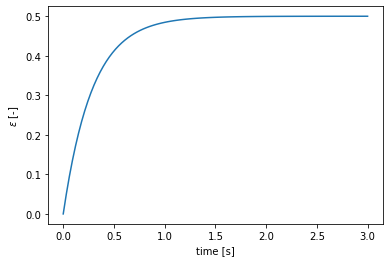

In [16]:
plt.plot(np.linspace(t_i, t_f, n),eps)
plt.xlabel('time [s]')
plt.ylabel('$\epsilon$ [-]')
pass

-------
## Stress relaxation test ($\dot{\epsilon} = 0$)

$\dot{\sigma} + \frac{E_1}{\eta}\sigma = \frac{E_0 E_1}{\eta}\epsilon$

#### Time discretization:
##### 1. Forward difference:

$\dot{\sigma} \approx \frac{\sigma^{i+1} - \sigma^i}{\Delta t}$

$\sigma^{i+1} = (1-\Delta t E_{eqv})\sigma^i + \Delta t E_0 E_{eqv} \epsilon$

with $E_{eqv} = E_1/\eta$.

In [34]:
#Initialize
t_i = 0
t_f = 3
n = 100
dt = (t_f-t_i)/100
eps = 1.0
E_0 = 200
E_1 = 100
eta = 20
sigma = np.zeros(n)
sigma[0] = eps*E_0 + eps*E_1

E_eqv = E_1/eta

for i in range(n-1):
    sigma[i+1] = (1-dt*E_eqv)*sigma[i] + dt*E_0*E_eqv*eps

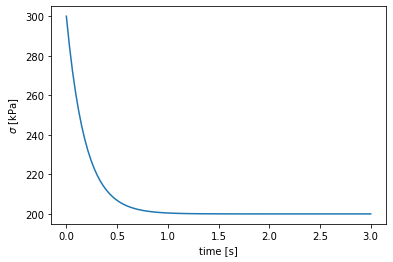

In [35]:
plt.plot(np.linspace(t_i, t_f, n),sigma)
plt.xlabel('time [s]')
plt.ylabel('$\sigma$ [kPa]')
pass

------
## 1D elongation at different strain rates

$\sigma + \frac{\eta}{E_1}\dot{\sigma} = E_0\epsilon - \frac{\eta}{E_1}(E_0 + E_1)\dot{\epsilon}$

$\dot{\epsilon}$: Prescribed

$\epsilon$: Integrate $\dot{\epsilon}$

$\dot{\sigma}$: Forward difference

Solve for $\sigma$.

$\dot{\sigma} + \frac{E_1}{\eta}\sigma= \frac{E_0 E_1}{\eta}\epsilon - (E_0 + E_1)\dot{\epsilon}$

#### Time discretization:
##### Backward difference:

$\dot{\sigma} \approx \frac{\sigma^{i} - \sigma^{i-1}}{\Delta t}$

$\sigma^i - \sigma^{i-1} + \frac{E_1\Delta t}{\eta}\sigma^i = \frac{E_0 E_1 \Delta t}{\eta} \epsilon^i - \Delta t (E_0 + E_1) \dot{\epsilon}$

with $\epsilon^i = \epsilon^{i-1} + \dot{\epsilon}\Delta t$ this becomes:

$(1+ \frac{E_1 \Delta t}{\eta})\sigma^i = \sigma^{i-1} + \frac{E_0 E_1 \Delta t}{\eta}\epsilon^{i-1} + \left[\frac{E_0 E_1 \Delta t}{\eta} - (E_0 + E_1) \right] \Delta t \dot{\epsilon}$

In [137]:
#Initialize
E_0 = 200
E_1 = 100
eta = 20
dt = 1/100

#Case 1: 0 to 0.5 strain in 1 sec, then relaxation for 2 sec.
t_i_1 = 0
t_f_1 = 3
n = int((t_f_1-t_i_1)/dt)
sigma_1 = np.zeros(n)
eps_1 = np.zeros(n)
epsdot_1 = 0.5/1.0 #0.5 strain per second

for i in range(1,n):
    eps_1[i] = eps_1[i-1] + epsdot_1*dt
    if eps_1[i]>0.5:
        epsdot_1 = 0
    sigma_1[i] = sigma_1[i-1] + E_0*E_1*dt/eta*eps_1[i] + dt*(E_0+E_1)*epsdot_1
    sigma_1[i] = sigma_1[i]/(1 + E_1*dt/eta)
    

#Case 2: 0 to 0.5 strain in 0.5 sec, then relaxation for 2 sec.
t_i_2 = 0
t_f_2 = 2.5
n = int((t_f_2-t_i_2)/dt)
sigma_2 = np.zeros(n)
eps_2 = np.zeros(n)
epsdot_2 = 0.5/0.5 #0.5 strain per 0.5 seconds

for i in range(1,n):
    eps_2[i] = eps_2[i-1] + epsdot_2*dt
    if eps_2[i]>0.5:
        epsdot_2 = 0
    
    sigma_2[i] = sigma_2[i-1] + E_0*E_1*dt/eta*eps_2[i] + dt*(E_0+E_1)*epsdot_2
    sigma_2[i] = sigma_2[i]/(1 + E_1*dt/eta)
    

#Case 3: 0 to 0.5 strain in 5 sec, then relaxation for 2 sec.
t_i_3 = 0
t_f_3 = 7
n = int((t_f_3-t_i_3)/dt)
sigma_3 = np.zeros(n)
eps_3 = np.zeros(n)
epsdot_3 = 0.5/5 #0.5 strain per 0.5 seconds

for i in range(1,n):
    eps_3[i] = eps_3[i-1] + epsdot_3*dt
    if eps_3[i]>0.5:
        epsdot_3 = 0
    
    sigma_3[i] = sigma_3[i-1] + E_0*E_1*dt/eta*eps_3[i] + dt*(E_0+E_1)*epsdot_3
    sigma_3[i] = sigma_3[i]/(1 + E_1*dt/eta)

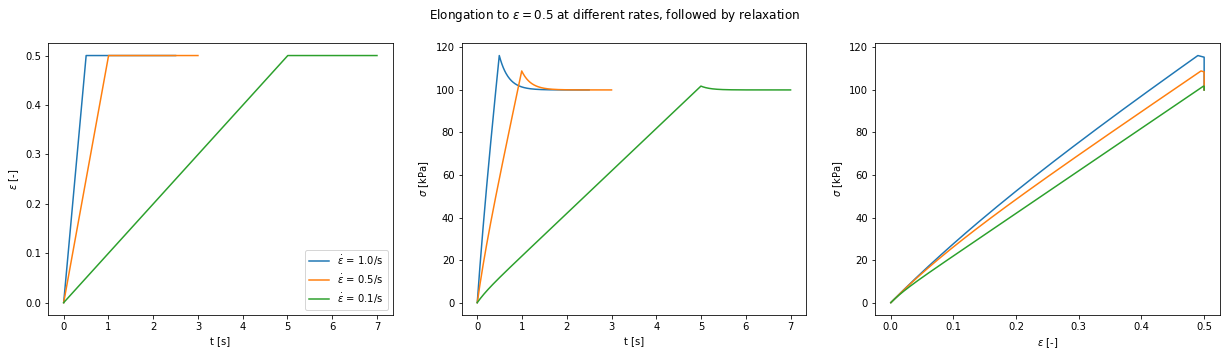

In [148]:
fig, ax = plt.subplots(1,3,figsize=[21,5])

ax[0].plot(np.linspace(t_i_2,t_f_2,sigma_2.shape[0]), eps_2, label='$\dot{\epsilon}$ = 1.0/s')
ax[0].plot(np.linspace(t_i_1,t_f_1,sigma_1.shape[0]), eps_1, label='$\dot{\epsilon}$ = 0.5/s')
ax[0].plot(np.linspace(t_i_3,t_f_3,sigma_3.shape[0]), eps_3, label='$\dot{\epsilon}$ = 0.1/s')
ax[0].set(xlabel='t [s]', ylabel='$\epsilon$ [-]')
ax[0].legend()


ax[1].plot(np.linspace(t_i_2,t_f_2,sigma_2.shape[0]), sigma_2, label='$\dot{\epsilon}$ = 1.0/s')
ax[1].plot(np.linspace(t_i_1,t_f_1,sigma_1.shape[0]), sigma_1, label='$\dot{\epsilon}$ = 0.5/s')
ax[1].plot(np.linspace(t_i_3,t_f_3,sigma_3.shape[0]), sigma_3, label='$\dot{\epsilon}$ = 0.1/s')
ax[1].set(xlabel='t [s]', ylabel='$\sigma$ [kPa]')


ax[2].plot(eps_2, sigma_2, label='$\dot{\epsilon}$ = 1.0/s')
ax[2].plot(eps_1, sigma_1, label='$\dot{\epsilon}$ = 0.5/s')
ax[2].plot(eps_3, sigma_3, label='$\dot{\epsilon}$ = 0.1/s')
ax[2].set(xlabel='$\epsilon$ [-]', ylabel='$\sigma$ [kPa]')

fig.suptitle('Elongation to $\epsilon=0.5$ at different rates, followed by relaxation')
pass

-----
## 3D formulation (Isotropic viscoelasticity)

$\mathbf{\sigma} = \mathbb{c}_0:\mathbf{\epsilon} + \mathbb{c}_1:(\mathbf{\epsilon}-\mathbf{\epsilon}^v)$

$\dot{\mathbf{\epsilon}}^v = \frac{1}{\eta} \mathbb{c}_1:(\mathbf{\epsilon}-\mathbf{\epsilon}^v)$




##### Discretization with backward Euler (Prescribed strain):

$\epsilon^{v,i} - \epsilon^{v,i-1} = \frac{\Delta t}{\eta} \mathbb{c}_1:(\epsilon - \epsilon^{v,i})$

or

$\epsilon^{v,i} = \left(\mathbb{I} + \frac{\Delta t}{\eta} \mathbb{c}_1 \right)^{-1} : \left(\epsilon^{v,i-1} + \frac{\Delta t}{\eta} \mathbb{c}_1 \epsilon \right)$ 

$\sigma^{i} = \mathbb{c}_0:\epsilon + \mathbb{c}_1:(\epsilon - \epsilon^{v,i})$